In [58]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from scipy.stats import linregress

In [59]:
# The path to our CSV file
file = "Data/applemobilitytrends-2020-08-08.csv"

# Read our mobility data into pandas
apple_mob_df = pd.read_csv(file)
apple_mob_df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,176.53,197.01,233.20,229.20,213.40,193.56,201.82,187.74,203.09,218.60
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,121.19,124.26,156.25,137.10,152.20,140.26,152.96,144.52,150.49,151.17
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,59.01,64.67,64.46,37.16,55.03,57.82,58.69,57.83,66.13,63.37
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,46.18,48.13,48.92,31.31,44.05,49.23,47.49,43.61,48.15,48.86
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,98.44,101.88,88.20,87.57,86.67,88.74,87.77,92.37,90.20,73.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,185.70,213.00,231.95,194.21,175.31,160.14,192.54,186.80,224.21,278.61
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,266.27,294.46,344.35,297.13,265.11,227.79,251.82,275.31,315.77,344.68
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,167.34,193.50,194.99,150.47,163.62,166.26,172.56,143.90,230.83,202.37
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,167.03,181.93,183.92,172.46,162.37,161.44,157.96,167.28,190.22,183.21


In [60]:
# Get a list of all of our columns for easy reference
apple_mob_df.columns

Index(['geo_type', 'region', 'transportation_type', 'alternative_name',
       'sub-region', 'country', '2020-01-13', '2020-01-14', '2020-01-15',
       '2020-01-16',
       ...
       '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03',
       '2020-08-04', '2020-08-05', '2020-08-06', '2020-08-07', '2020-08-08'],
      dtype='object', length=215)

In [61]:
# Filter the data so that only the US are in a DataFrame
usa_apple_mob_df = apple_mob_df.loc[apple_mob_df["country"] == "United States"]
usa_apple_mob_df

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08
158,city,Akron,driving,NaN,Ohio,United States,100.0,103.06,107.50,106.14,...,161.31,171.12,150.96,116.95,147.48,148.57,157.46,159.12,177.50,168.17
159,city,Akron,transit,NaN,Ohio,United States,100.0,106.69,103.75,100.22,...,50.66,54.78,51.47,33.53,56.54,45.22,55.59,50.66,55.07,49.71
160,city,Akron,walking,NaN,Ohio,United States,100.0,97.23,79.05,74.77,...,116.97,134.69,118.04,93.88,114.89,115.93,129.45,127.06,142.07,129.24
161,city,Albany,driving,NaN,New York,United States,100.0,102.35,107.35,105.54,...,143.36,153.86,138.83,109.10,138.11,121.81,146.10,147.56,154.22,143.79
162,city,Albany,transit,NaN,New York,United States,100.0,100.14,105.95,107.76,...,77.33,89.32,79.42,78.73,88.43,75.20,90.11,86.76,86.99,86.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,county,York County,driving,NaN,Virginia,United States,100.0,100.96,111.03,111.97,...,185.70,213.00,231.95,194.21,175.31,160.14,192.54,186.80,224.21,278.61
3621,county,York County,driving,NaN,Maine,United States,100.0,103.05,103.98,82.24,...,266.27,294.46,344.35,297.13,265.11,227.79,251.82,275.31,315.77,344.68
3622,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,167.34,193.50,194.99,150.47,163.62,166.26,172.56,143.90,230.83,202.37
3623,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,167.03,181.93,183.92,172.46,162.37,161.44,157.96,167.28,190.22,183.21


In [62]:
clean_usa_apple_df = usa_apple_mob_df.drop(['geo_type','region','alternative_name','country'], axis = 1)
clean_usa_apple_df

,transportation_type,sub-region,2020-01-13,2020-01-14,2020-01-15,2020-01-16,2020-01-17,2020-01-18,2020-01-19,2020-01-20,...,2020-07-30,2020-07-31,2020-08-01,2020-08-02,2020-08-03,2020-08-04,2020-08-05,2020-08-06,2020-08-07,2020-08-08
158,driving,Ohio,100.0,103.06,107.50,106.14,123.62,105.99,82.68,94.99,...,161.31,171.12,150.96,116.95,147.48,148.57,157.46,159.12,177.50,168.17
159,transit,Ohio,100.0,106.69,103.75,100.22,89.04,74.85,56.99,75.59,...,50.66,54.78,51.47,33.53,56.54,45.22,55.59,50.66,55.07,49.71
160,walking,Ohio,100.0,97.23,79.05,74.77,89.55,88.39,49.30,56.29,...,116.97,134.69,118.04,93.88,114.89,115.93,129.45,127.06,142.07,129.24
161,driving,New York,100.0,102.35,107.35,105.54,128.97,88.28,82.76,102.46,...,143.36,153.86,138.83,109.10,138.11,121.81,146.10,147.56,154.22,143.79
162,transit,New York,100.0,100.14,105.95,107.76,101.39,85.79,82.86,126.71,...,77.33,89.32,79.42,78.73,88.43,75.20,90.11,86.76,86.99,86.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,driving,Virginia,100.0,100.96,111.03,111.97,136.50,136.17,104.60,117.02,...,185.70,213.00,231.95,194.21,175.31,160.14,192.54,186.80,224.21,278.61
3621,driving,Maine,100.0,103.05,103.98,82.24,129.29,121.27,95.19,116.93,...,266.27,294.46,344.35,297.13,265.11,227.79,251.82,275.31,315.77,344.68
3622,driving,Texas,100.0,98.85,97.76,92.21,115.79,128.73,92.48,114.43,...,167.34,193.50,194.99,150.47,163.62,166.26,172.56,143.90,230.83,202.37
3623,driving,California,100.0,102.98,103.10,114.08,118.83,121.49,93.29,101.86,...,167.03,181.93,183.92,172.46,162.37,161.44,157.96,167.28,190.22,183.21


In [63]:
grouped_df = clean_usa_apple_df.groupby(['sub-region','transportation_type'])
# grouped_df.sum()


In [65]:
new_grouped_df = pd.DataFrame(grouped_df.mean())
new_grouped_df

2020-01-13  2020-01-14  2020-01-15  \
sub-region    transportation_type                                       
Alabama       driving                   100.0  106.228929  103.904286   
              transit                   100.0  105.690000  102.700000   
              walking                   100.0   94.690000   98.190000   
Alaska        driving                   100.0  102.791667  101.543333   
              walking                   100.0   98.800000   98.830000   
...                                       ...         ...         ...   
West Virginia driving                   100.0  101.714231  103.795000   
Wisconsin     driving                   100.0  102.640566   98.128302   
              transit                   100.0  104.250000  102.550000   
              walking                   100.0  124.115000  110.765000   
Wyoming       driving                   100.0  108.399167  107.194167   

                                   2020-01-16  2020-01-17  2020-01-18  \
sub-region    transportation_type                                       
Alabama       driving              112.426250  146.912321  124.912857   
              transit              104.550000  114.790000  136.980000   
              walking              102.980000  122.600000  124.460000   
Alaska        driving              107.295000  129.666667  129.235000   
              walking              104.050000  117.890000  103.230000   
...                                       ...         ...         ...   
West Virginia driving              106.706154  127.506538  105.873462   
Wisconsin     driving              109.983208  125.636415  107.240377   
              transit              101.760000  113.710000   91.500000   
              walking              110.405000  131.570000  156.595000   
Wyoming       driving              109.060833  133.878333  153.823333   

                                   2020-01-19  2020-01-20  2020-01-21  \
sub-region    transportation_type                                       
Alabama       driving               99.951607  118.806071  103.450714   
              transit               92.890000  115.080000  102.130000   
              walking               80.390000   86.440000   90.750000   
Alaska        driving               94.898333   99.936667  105.630000   
              walking               80.290000   83.590000  104.400000   
...                                       ...         ...         ...   
West Virginia driving               88.955769  106.681154  100.490000   
Wisconsin     driving              103.555660  109.449057  101.407736   
              transit               83.745000  134.910000  199.430000   
              walking              116.805000  148.770000  235.415000   
Wyoming       driving              111.505000  109.826667  104.907500   

                                   2020-01-22  ...  2020-07-30  2020-07-31  \
sub-region    transportation_type              ...                           
Alabama       driving              102.401607  ...  179.789286  208.809107   
              transit              114.790000  ...   93.030000   98.440000   
              walking               93.730000  ...  152.640000  164.680000   
Alaska        driving              104.468333  ...  246.126667  279.526667   
              walking               99.900000  ...  190.210000  194.610000   
...                                       ...  ...         ...         ...   
West Virginia driving              100.476923  ...  188.046154  210.518077   
Wisconsin     driving               98.582264  ...  239.859811  281.327358   
              transit              196.410000  ...   53.545000   55.055000   
              walking              217.510000  ...  170.365000  188.440000   
Wyoming       driving              100.069167  ...  377.380833  408.496667   

                                   2020-08-01  2020-08-02  2020-08-03  \
sub-region    transportation_type                                       
Alabama       driving   

In [66]:
mobility_grouped_df = new_grouped_df.stack(level=0).unstack(level=0)


sub-region                         Alabama      Alaska     Arizona  \
transportation_type                                                  
driving             2020-01-13  100.000000  100.000000  100.000000   
                    2020-01-14  106.228929  102.791667  102.441250   
                    2020-01-15  103.904286  101.543333  106.017500   
                    2020-01-16  112.426250  107.295000  112.265000   
                    2020-01-17  146.912321  129.666667  144.551875   
...                                    ...         ...         ...   
walking             2020-08-04  148.450000  196.430000  111.655000   
                    2020-08-05  142.610000  198.250000  110.975000   
                    2020-08-06  147.440000  189.150000  113.215000   
                    2020-08-07  162.870000  209.620000  129.210000   
                    2020-08-08  168.920000  182.970000  118.010000   

sub-region                        Arkansas  California    Colorado  \
transportation_type                                                  
driving             2020-01-13  100.000000  100.000000  100.000000   
                    2020-01-14  102.640638  100.790135   98.822564   
                    2020-01-15   99.376809  104.586351  101.607179   
                    2020-01-16  107.291915  106.606081  110.052821   
                    2020-01-17  131.684468  132.547297  149.267436   
...                                    ...         ...         ...   
walking             2020-08-04         NaN  147.105714  170.540000   
                    2020-08-05         NaN  148.240476  174.875000   
                    2020-08-06         NaN  152.414286  182.165000   
                    2020-08-07         NaN  174.486190  211.945000   
                    2020-08-08         NaN  176.930952  205.975000   

sub-region                      Connecticut    Delaware     Florida  \
transportation_type                                                   
driving             2020-01-13   100.000000  100.000000  100.000000   
                    2020-01-14   105.730909   97.843333  101.525075   
                    2020-01-15   108.341818  101.126667  103.646716   
                    2020-01-16   109.506364  103.093333  110.552388   
                    2020-01-17   129.346364  120.203333  135.158806   
...                                     ...         ...         ...   
walking             2020-08-04   107.513333         NaN  104.010000   
                    2020-08-05   145.453333         NaN  103.623333   
                    2020-08-06   147.600000         NaN  106.601667   
                    2020-08-07   169.220000         NaN  126.201667   
                    2020-08-08   166.810000         NaN  128.720000   

sub-region                         Georgia  ...   Tennessee       Texas  \
transportation_type                         ...                           
driving             2020-01-13  100.000000  ...  100.000000  100.000000   
                    2020-01-14  102.542130  ...  102.190685  101.345864   
                    2020-01-15  103.869722  ...  100.962055  101.260366   
                    2020-01-16  112.284167  ...  109.449315  105.695707   
                    2020-01-17  140.879815  ...  133.958630  131.525864   
...                                    ...  ...         ...         ...   
walking             2020-08-04  143.460000  ...  137.105000  142.700000   
                    2020-08-05  141.690000  ...  138.510000  140.788333   
                    2020-08-06  146.610000  ...  148.560000  145.705000   
                    2020-08-07  173.130000  ...  172.985000  172.746667   
                    2020-08-08  191.750000  ...  178.245000  177.908333   

sub-region                            Utah     Vermont  Virgin Islands  \
transportation_type                                                      
driving             2020-01-13  100.000000  100.000000         100.000   
                    2020-01-14  103.360000   99.104167  

In [115]:
# mobility_grouped_df.iloc[mobility_grouped_df.index('driving')]
driving_us = mobility_grouped_df.drop(['transit','walking'])
us_driving_df = driving_us.reset_index()

In [117]:
# Export the US driving data into a csv
us_driving_df.to_csv("Data/us_driving_df.csv")

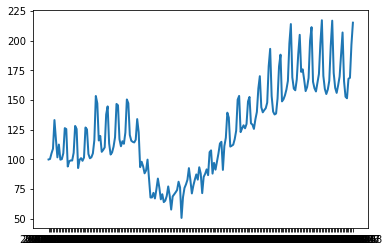

In [116]:
plt.plot(us_driving_df['level_1'],us_driving_df['Virginia'],linewidth=2)